## **Trabajo Práctico: La Gran Prueba de Sabor**

**Apellido y Nombres de los Integrantes del grupo:**


1. XXXXX, XXXXXXX
2. XXXXX, XXXXXXX
3. XXXXX, XXXXXXX
4. XXXXX, XXXXXXX



# **Presentación**



**Una consultora** ha sido contratada para realizar un **análisis de mercado** y **proporcionar recomendaciones estratégicas** para la apertura de una cafetería en EE.UU.  

Se le solicitó llevar a cabo un estudio utilizando los datos de la encuesta [**"La Gran Prueba de Sabor"**](https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2024/2024-05-14/coffee_survey.csv), con el fin de extraer información sobre las preferencias de los consumidores y ayudar al grupo inversor a diseñar una estrategia informada para su incursión en el sector. Esta encuesta la realizó el famoso barista *James Hoffmann* en octubre de 2023, durante una transmisión en vivo con unas *4.000 personas* en Estados Unidos.

#**Objetivo del Proyecto Final**

En este Proyecto Final, el alumno asumirá el rol de consultor. Para la lectura, manipulación y análisis de los datos de la encuesta se debe usar el paquete Pandas.

#**Consignas**



1. Descargar el archivo de la encuesta ejecutando el código que se propone a continuación.


In [ ]:
#No modificar este código que le permitirá bajar el archivo que necesita para trabajar

import requests

url_coffee_survey = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2024/2024-05-14/coffee_survey.csv"
archivo_salida_coffee_survey = "coffee_survey.csv"

def descargarCSV(url, archivo_salida):
    print("Descargando archivo...")
    consulta = requests.get(url)
    contenido = consulta.content

    print("Guardando archivo...")
    # Abrir conexion en modo escritura
    with open(archivo_salida, "w", encoding="utf-8") as archivo:
        # Escribir el contenido de la consulta
        archivo.write(contenido.decode("utf-8"))

    print("¡Archivo descargado con éxito!")

descargarCSV(url_coffee_survey,archivo_salida_coffee_survey)


Descargando archivo...
Guardando archivo...
¡Archivo descargado con éxito!


2. Una vez descargado el archivo analice su contenido. ¿Qué información brinda de cada persona encuestada? ¿Todos los encuestados respondieron a todas las preguntas?  

3. Explore libremente los datos utilizando Pandas.

In [4]:
import pandas as pd

df = pd.read_csv('coffee_survey.csv')

df.head()

df['age']

df['additions']

df.info()

df.tail(10)

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   submission_id                 4042 non-null   object 
 1   age                           4011 non-null   object 
 2   cups                          3949 non-null   object 
 3   where_drink                   3972 non-null   object 
 4   brew                          3657 non-null   object 
 5   brew_other                    678 non-null    object 
 6   purchase                      710 non-null    object 
 7   purchase_other                31 non-null     object 
 8   favorite                      3980 non-null   object 
 9   favorite_specify              114 non-null    object 
 10  additions                     3959 non-null   object 
 11  additions_other               48 non-null     object 
 12  dairy                         1686 non-null   object 
 13  swe

(4042, 57)

  Ahora haremos una **exploración guiada de la encuesta utilizando `Pandas`**. En los siguientes ejercicios no puede usar estructuras de repetición (`for`, `while`, etc), salvo que el enunciado indique explícitamente lo contrario.

4. Cargue la información del archivo *coffee_survey.csv* en un `DataFrame` llamado `encuesta`.
5. Utilice el método `info` sobre el `DataFrame` cargado con los datos de la encuesta. ¿Qué información importante nos brinda este método sobre los datos recién cargados? Comente.

In [9]:
import pandas as pd

# 4. Cargar los datos
encuesta = pd.read_csv('coffee_survey.csv')

# 5. Invocar al método info
encuesta.info


<bound method DataFrame.info of      submission_id              age cups  \
0           gMR29l  18-24 years old  NaN   
1           BkPN0e  25-34 years old  NaN   
2           W5G8jj  25-34 years old  NaN   
3           4xWgGr  35-44 years old  NaN   
4           QD27Q8  25-34 years old  NaN   
...            ...              ...  ...   
4037        PA44VP    >65 years old    2   
4038        vNgpPD    >65 years old    2   
4039        g5ggRM  18-24 years old    1   
4040        rlgbDN  25-34 years old    2   
4041        0EGYe9  25-34 years old    1   

                                       where_drink  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   
...                                            ...   
4037                                       At home   
4038   

Haga aquí sus comentarios sobre la información devuelta por el método `info`: *completar*

6. Analice la columna *'age'* que indica el rango de edad del encuestado. ¿Qué cantidad de los encuestados que brindaron esta información pertenecen a los rangos *'<18 years old'*, *'18-24 years old'*, *'25-34 years old'*, *'35-44 years old'*, *'45-54 years old'*, *'55-64 years old'* y *'>65 years old'*, respectivamente? Ignore los valores *'NA'*.

In [16]:
# 6. Analizar la columna 'age'
encuesta.groupby('age').size()


age
18-24 years old     461
25-34 years old    1986
35-44 years old     960
45-54 years old     302
55-64 years old     187
<18 years old        20
>65 years old        95
dtype: int64

7. Analice la columna 'where_drink' que indica dónde toman café los encuestados. ¿Qué diferencia encuentra entre esta columna de la anterior? ¿Qué cantidad de los encuestados que respondieron a esta pregunta toman el café *'On the go'*, *'At a cafe'*, *'At the office'*, *'At home'*, *'None of these'*, respectivamente? Ignore los valores *'NA'*.

    **Ayuda**: investigue el método  `explode`.

In [ ]:
# 7. Analizar la columna 'where_drink'


Conteo de lugares de consumo:
 where_drink
At home          3644
At the office    1430
At a cafe        1170
On the go         705
None of these      36
Name: count, dtype: int64


8. Analice los códigos propuestos para responder a las consignas 6. y 7. Son similares, ¿verdad? Proponga una función `procesar_columna`, que recibiendo el `DataFrame` y el nombre de la columna a analizar, sirva para resolver los dos casos anteriores.

In [ ]:
# 8. Función para procesar cualquier columna
def procesar_columna(dataframe, columna):
  pass

9. Pruebe la función anterior, analizando las columnas *'gender'* y *'cups'*. ¿Funciona?

In [ ]:
# 9. Pruebas de la función


Conteo de cups:
 gender
Male                      2524
Female                     853
Non-binary                 103
Prefer not to say           33
Other (please specify)      10
Name: count, dtype: int64
Conteo de brew:
 cups
2              1663
1              1277
3               473
Less than 1     348
4               121
More than 4      67
Name: count, dtype: int64


10. Implemente una función llamada `filtrar_columna_valor` que reciba un `DataFrame`, el nombre de una columna y un valor para dicha columna como argumentos. La función debe filtrar las filas, devolviendo sólo aquellas que hayan pasado el filtro aplicado. Hacer dos pruebas, filtrando por `gender` igual a `Female` y `gender` igual a `Male`. Mostrar en pantalla los primeros 5 registros de cada resultado obtenido.

In [ ]:
# 10. Filtrar encuesta
def filtrar_columna_valor(dataframe, columna, valor):
  pass



,submission_id,age,cups,where_drink,brew,brew_other,purchase,purchase_other,favorite,favorite_specify,...,spent_equipment,value_equipment,gender,gender_specify,education_level,ethnicity_race,ethnicity_race_specify,employment_status,number_children,political_affiliation
17,QA5JYA,25-34 years old,1,"At home, At the office, On the go","Pour over, Coffee brewing machine (e.g. Mr. Co...",NaN,"National chain (e.g. Starbucks, Dunkin), Local...",NaN,Regular drip coffee,NaN,...,NaN,NaN,Female,NaN,Bachelor's degree,White/Caucasian,NaN,Employed full-time,NaN,Democrat
53,WApbYk,35-44 years old,1,"At the office, At home",Other,Aeropress,NaN,NaN,Americano,NaN,...,$100-$300,Yes,Female,NaN,Bachelor's degree,White/Caucasian,NaN,Employed full-time,1,No affiliation
63,NABN5G,45-54 years old,More than 4,At home,"Pod/capsule machine (e.g. Keurig/Nespresso), O...",Aeropress,NaN,NaN,Americano,NaN,...,$100-$300,Yes,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,vNx8Xv,35-44 years old,1,At home,French press,NaN,NaN,NaN,Cold brew,NaN,...,$50-$100,Yes,Female,NaN,Bachelor's degree,White/Caucasian,NaN,Unemployed,1,Democrat
82,7d97lZ,25-34 years old,2,"At home, At the office",Coffee extract (e.g. Cometeer),NaN,NaN,NaN,Americano,NaN,...,$20-$50,No,Female,NaN,Doctorate or professional degree,Asian/Pacific Islander,NaN,Employed full-time,NaN,Democrat


,submission_id,age,cups,where_drink,brew,brew_other,purchase,purchase_other,favorite,favorite_specify,...,spent_equipment,value_equipment,gender,gender_specify,education_level,ethnicity_race,ethnicity_race_specify,employment_status,number_children,political_affiliation
34,ylqbBg,45-54 years old,2,"At home, At the office, At a cafe, On the go","Pour over, French press, Espresso",NaN,"Local cafe, Specialty coffee shop",NaN,Regular drip coffee,NaN,...,$500-$1000,Yes,Male,NaN,Master's degree,Other (please specify),Mix,Employed full-time,2,No affiliation
41,YZzBdN,25-34 years old,2,"At home, At the office","Pour over, Espresso",NaN,NaN,NaN,Pourover,NaN,...,$50-$100,Yes,Male,NaN,Master's degree,Asian/Pacific Islander,NaN,Unemployed,NaN,Independent
42,VZ17Z6,35-44 years old,1,"At the office, At home",Pour over,NaN,NaN,NaN,Iced coffee,NaN,...,$100-$300,Yes,Male,NaN,Bachelor's degree,White/Caucasian,NaN,Employed full-time,3,No affiliation
43,RzBeZj,45-54 years old,More than 4,At home,"Pour over, French press, Pod/capsule machine (...",NaN,NaN,NaN,Pourover,NaN,...,$300-$500,Yes,Male,NaN,Bachelor's degree,White/Caucasian,NaN,Employed full-time,3,No affiliation
46,WApbkQ,35-44 years old,2,"At a cafe, At home","Espresso, Pod/capsule machine (e.g. Keurig/Nes...",NaN,NaN,NaN,Cappuccino,NaN,...,"More than $1,000",Yes,Male,NaN,Less than high school,Black/African American,NaN,Unemployed,2,Independent


11. Realice un gráfico de torta que muestre el porcentaje de consumidores pertenecientes a cada grupo etario.

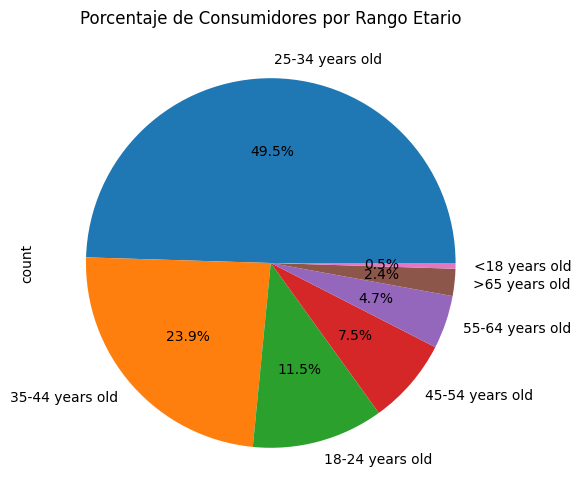

In [ ]:
import matplotlib.pyplot as plt

# 11. Gráfico de grupos etarios


12. Realice un gráfico de barras para cada grupo etario, mostrando cuántos consumidores prefieren cada tipo de café.

    **Ayuda**: investigue los métodos  `size` y `unstack`. Puede usar una estructura de repetición for para la creación de los gráficos, que le permita en cada iteración graficar la información correspondiente a cada grupo etario.

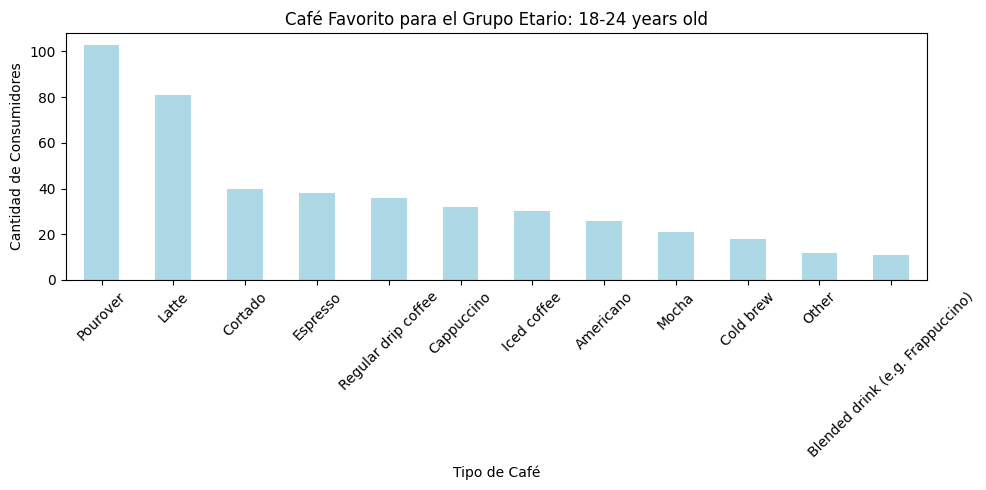

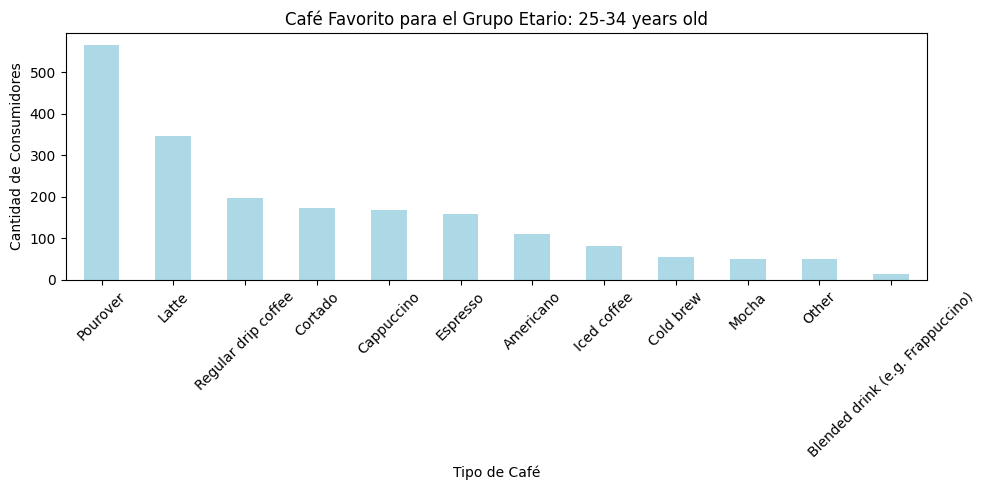

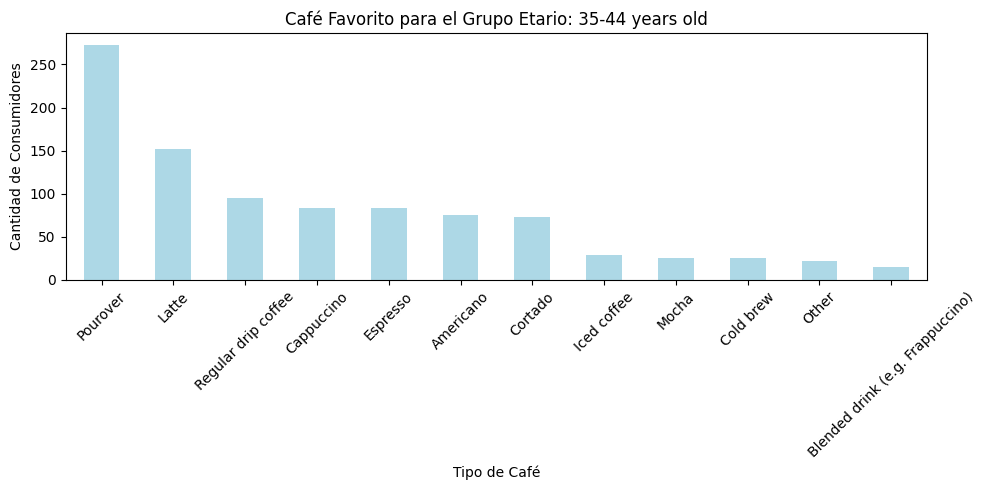

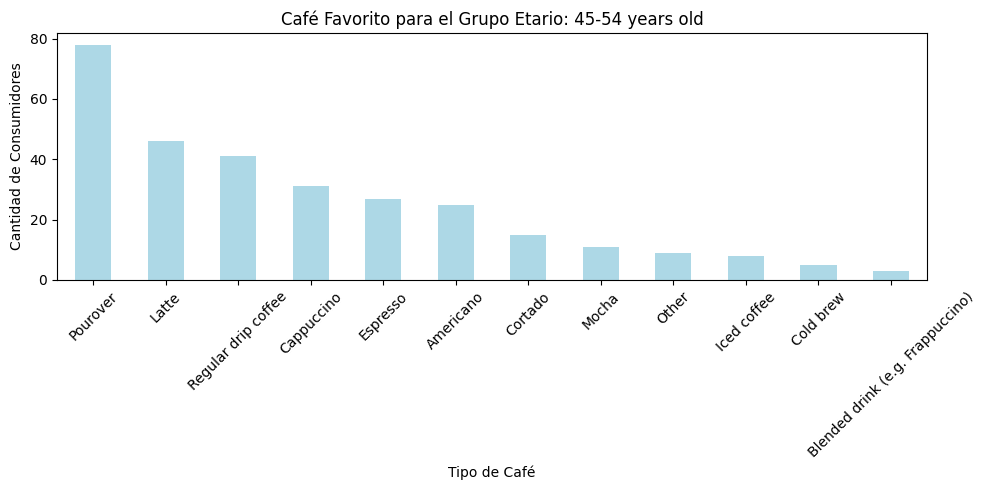

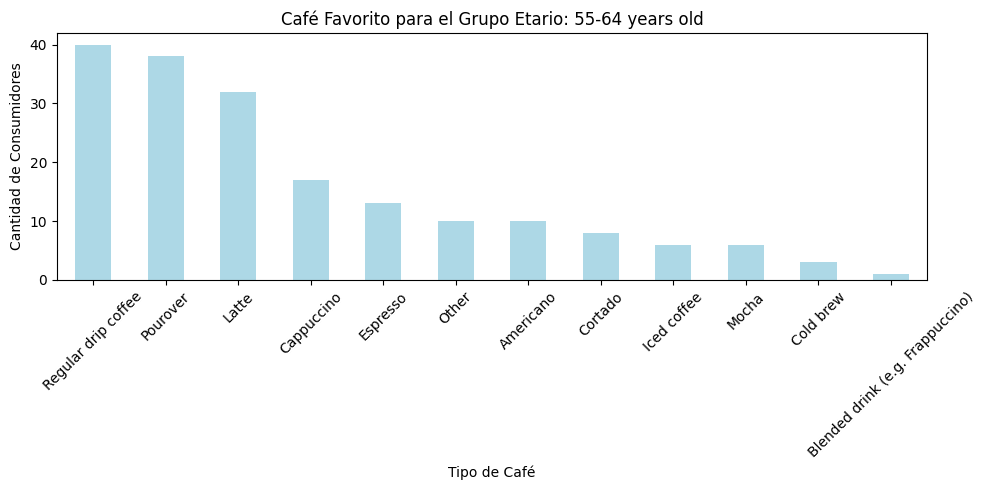

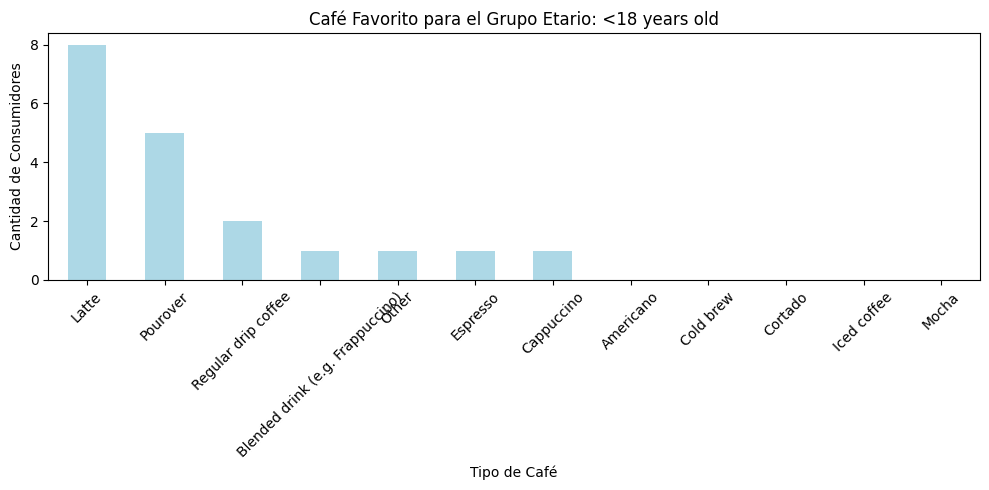

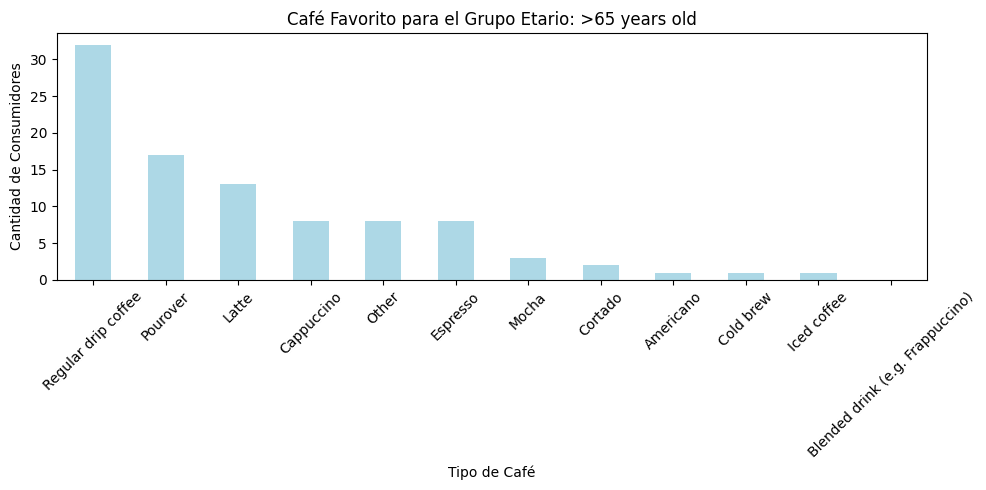

In [ ]:
# 12. Gráfico de café favorito por grupos etarios



13. Calcule el nivel educativo más frecuente entre los consumidores que respondieron la encuesta.

    **Ayuda:** Puede usar `groupby` o investigar `mode`.

In [ ]:
# Nivel educativo más frecuente


El nivel educativo más frecuente es: Bachelor's degree


**13-** **Conclusiones:**

Realice un análisis exhaustivo de los datos cargados en el `DataFrame` llamado `encuesta` recién creado. ¿Qué información relevante se puede extraer? Puede ayudarse de los gráficos o imprimir en pantalla información de este `DataFrame`. Reflexione sobre las conclusiones que se pueden obtener a partir de esta información.

Además, ¿qué recomendaciones ofrecería a su cliente para optimizar su cafetería? Por ejemplo, ¿a qué segmentos de clientes debería orientar su campaña de marketing para maximizar el impacto y atraer a más consumidores?

*Complete aquí sus conclusiones*